In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Get Data 

In [2]:
link = "C:/Users/Raeyk/Downloads/Kaleab/Kaggle Credit Card Fraud/Data/creditcard.csv"
df = pd.read_csv(link)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check for missing 
df.isna().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.info()
# 29 features 
# 284807 instances 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.Class.value_counts() 
# The data looks unbalanced with a small portion of the data being labeled as fraud
# This is a good thing indicating there is not a lot of fraud

0    284315
1       492
Name: Class, dtype: int64

In [6]:
print(f'Share of fraud is {round((df.Class.value_counts()[1]/df.shape[0])*100,2)}')
# However, this will make it harder for predictions with only 0.172% labeled fraud

Share of fraud is 0.17


In [7]:
# Let's look at the stats of the data 
df.describe()
# Looks like Time and Amount are the only features we can identify
# While the others V1-V28 can't be identified on what they represent
# But looking at the source they have been transformed by PCA (principal component analysis)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Let's optimize memory usage 

In [8]:
df.memory_usage(deep=True).sum()/1000000
# We are starting with 70.6 mbs 

70.632264

In [9]:
# Checking integer types
(df
.select_dtypes('int')
.describe()
)

,Class
count,284807.000000
mean,0.001727
std,0.041527
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
# Looking at the integer values we only have the class and we can covert that to uint8
np.iinfo('uint8') 

iinfo(min=0, max=255, dtype=uint8)

In [11]:
# Similarly checking floats 
(df
.select_dtypes('float')
.describe()
)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [12]:
# Let's see the Max value and the Min value to change the data type. 

for col in df.columns:
    # calculate the maximum value for the column
    max_val = df[col].max()
    # calculate the minimum value for the column
    min_val = df[col].min()
    # print the results
    print(f"Column {col}: max = {max_val}, min = {min_val}")



Column Time: max = 172792.0, min = 0.0
Column V1: max = 2.45492999121121, min = -56.407509631329
Column V2: max = 22.0577289904909, min = -72.7157275629303
Column V3: max = 9.38255843282114, min = -48.3255893623954
Column V4: max = 16.8753440335975, min = -5.68317119816995
Column V5: max = 34.8016658766686, min = -113.743306711146
Column V6: max = 73.3016255459646, min = -26.1605059358433
Column V7: max = 120.589493945238, min = -43.5572415712451
Column V8: max = 20.0072083651213, min = -73.2167184552674
Column V9: max = 15.5949946071278, min = -13.4340663182301
Column V10: max = 23.7451361206545, min = -24.5882624372475
Column V11: max = 12.0189131816199, min = -4.79747346479757
Column V12: max = 7.8483920756446, min = -18.6837146333443
Column V13: max = 7.12688295859376, min = -5.79188120632084
Column V14: max = 10.5267660517847, min = -19.2143254902614
Column V15: max = 8.87774159774277, min = -4.49894467676621
Column V16: max = 17.3151115176278, min = -14.1298545174931
Column V17: 

In [14]:
# Change type for time, amount and class
df = (df
.assign(Time=df.Time.astype('uint32'),
        Amount=df.Amount.astype('uint16'),
        Class=df.Class.astype('uint8'))
) 

In [15]:
# Save 5 mbs compared to the OG 
df.memory_usage(deep=True).sum()/1000000

65.790545

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,87.869652,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.148683,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.000000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.000000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.000000,1.000000


In [17]:
df[['Time','Amount','Class']].dtypes

Time      uint32
Amount    uint16
Class      uint8
dtype: object

### Split The Data to Train and Test
#### From this point one we only have the train data 

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1) 
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Detecting Outliers

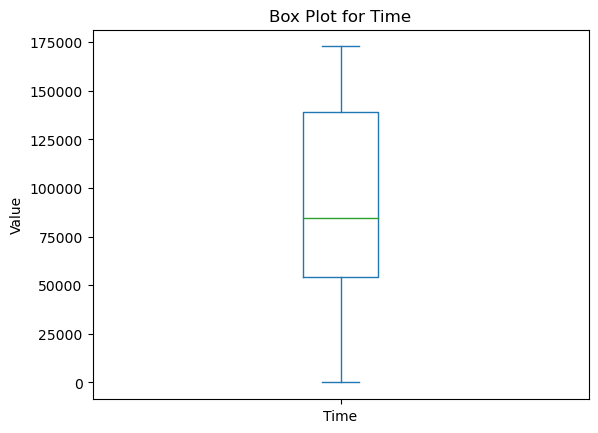

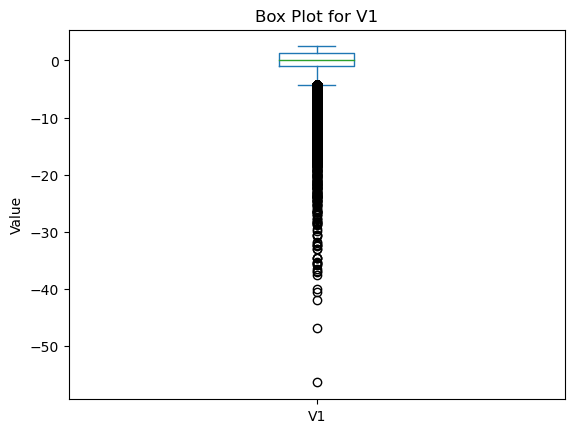

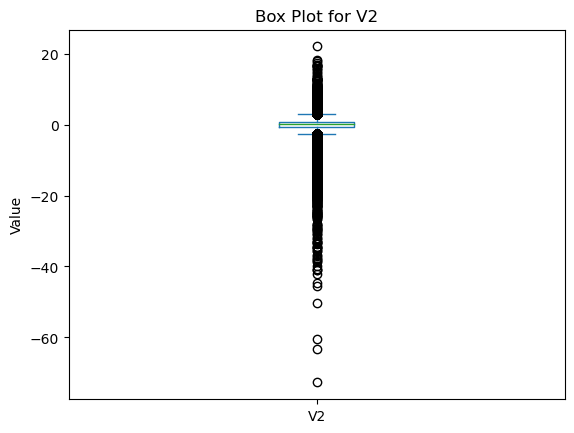

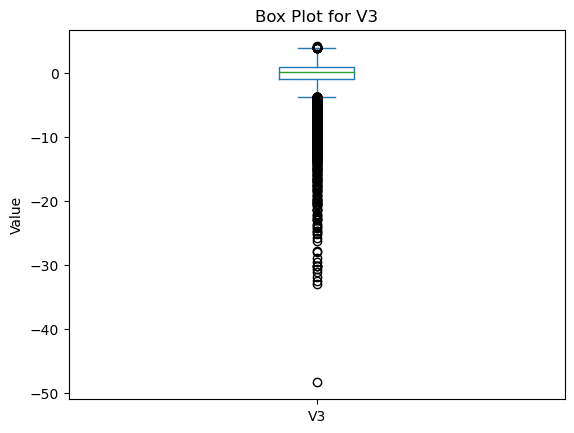

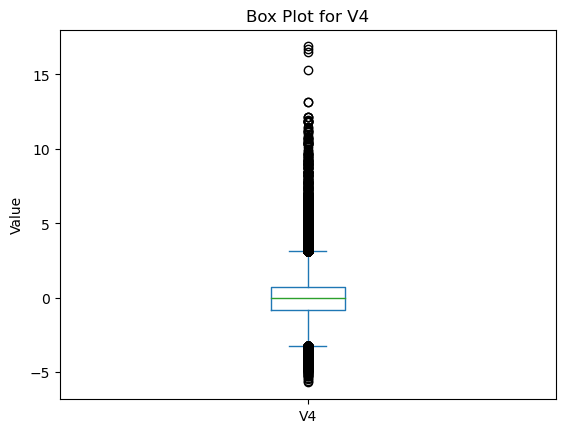

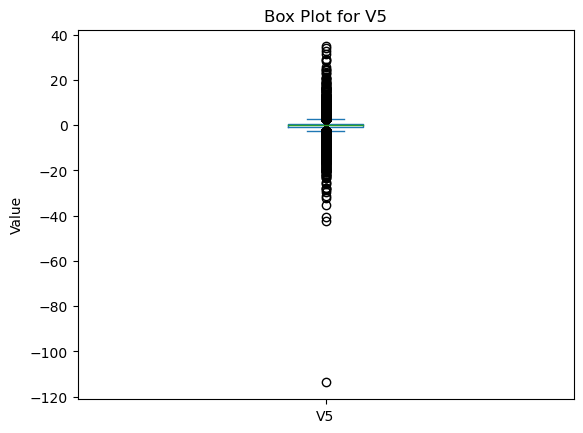

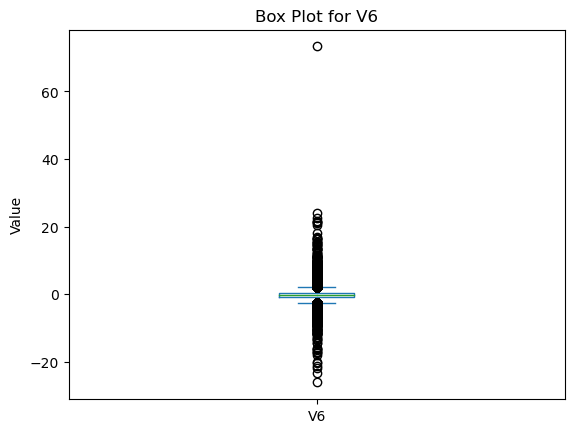

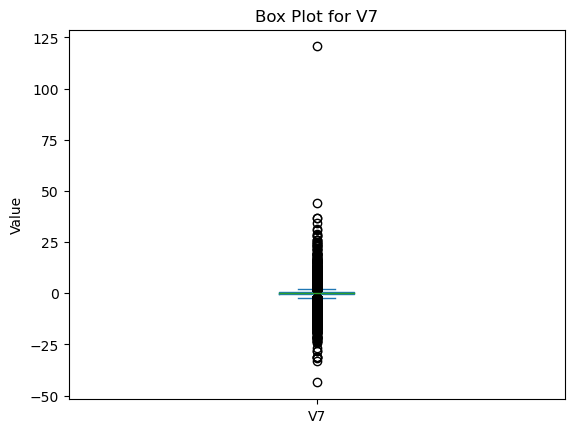

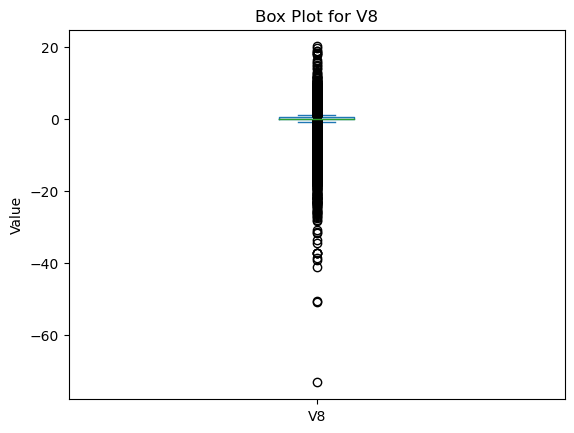

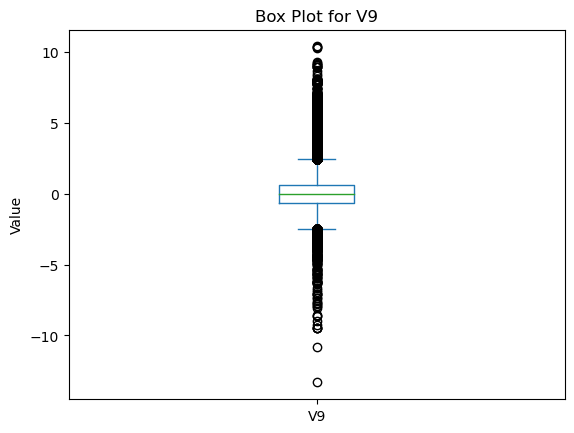

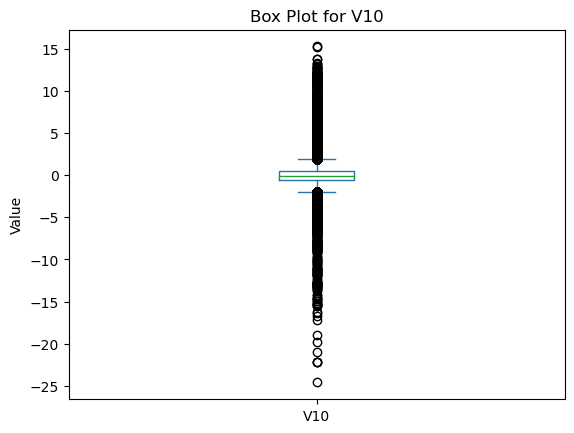

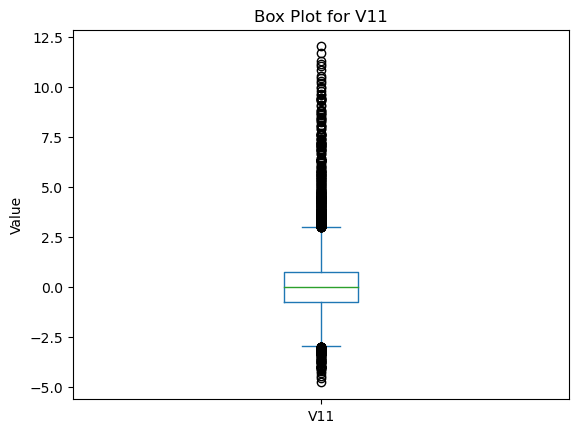

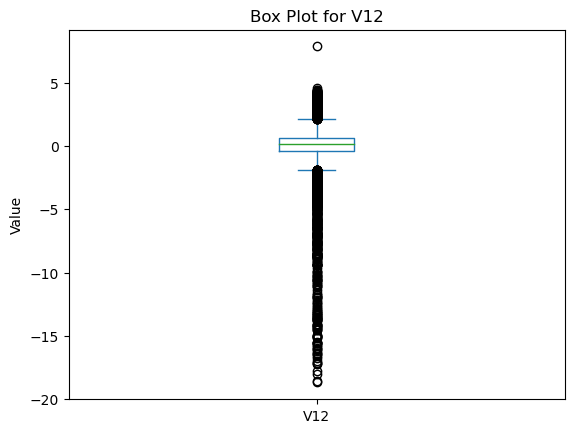

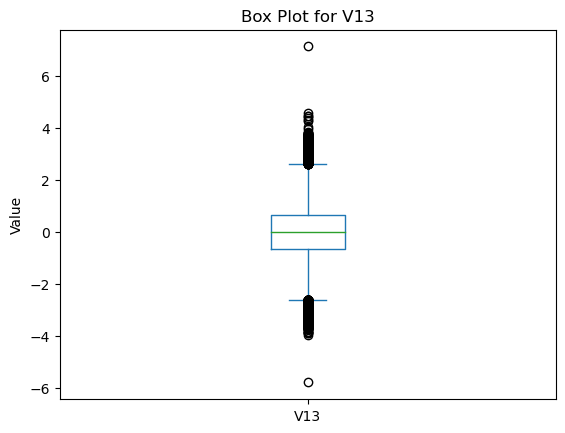

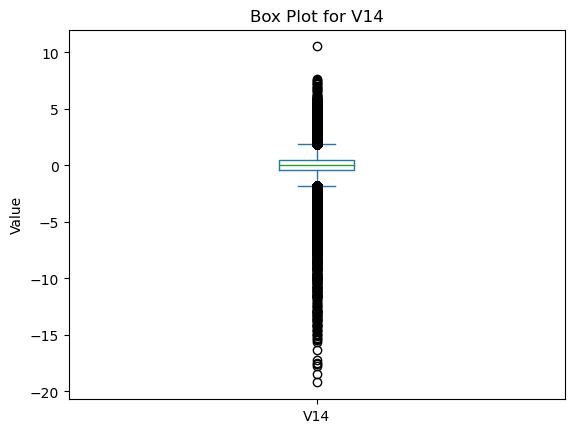

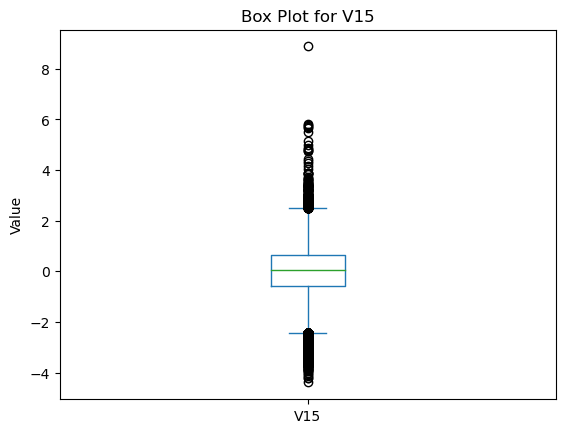

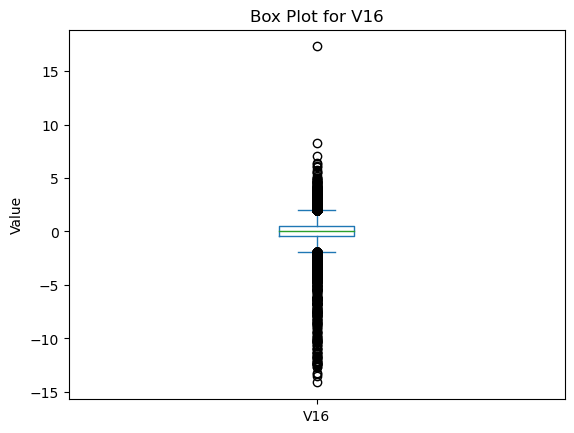

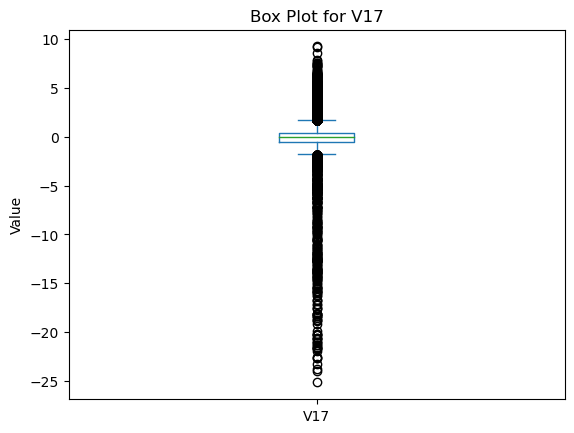

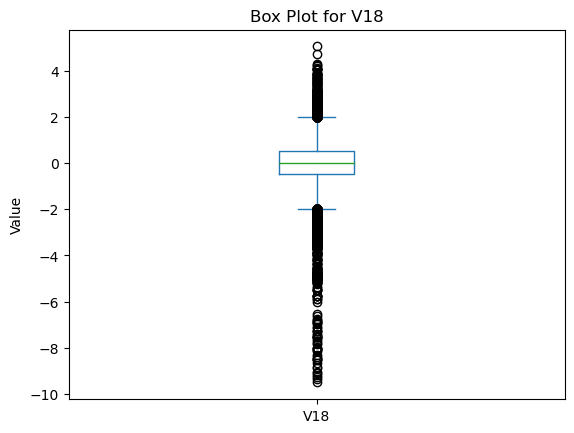

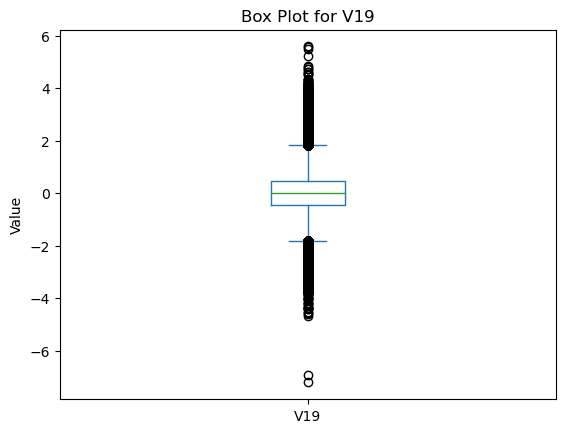

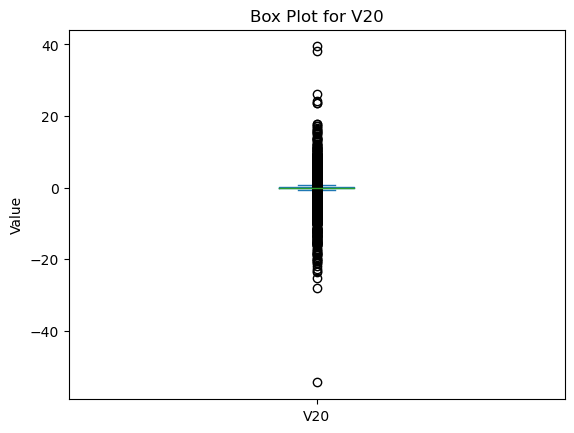

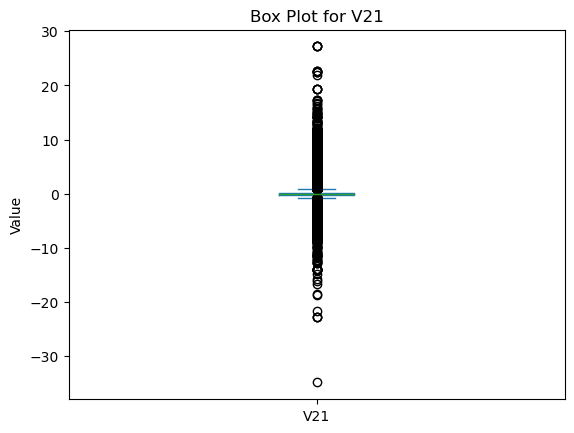

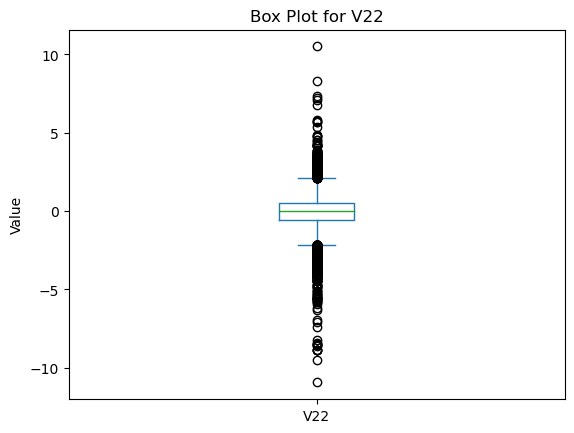

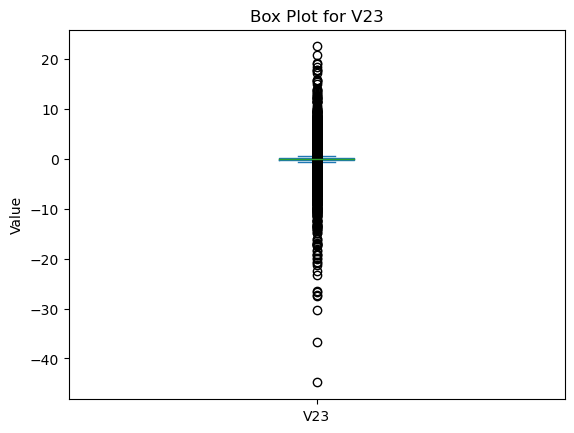

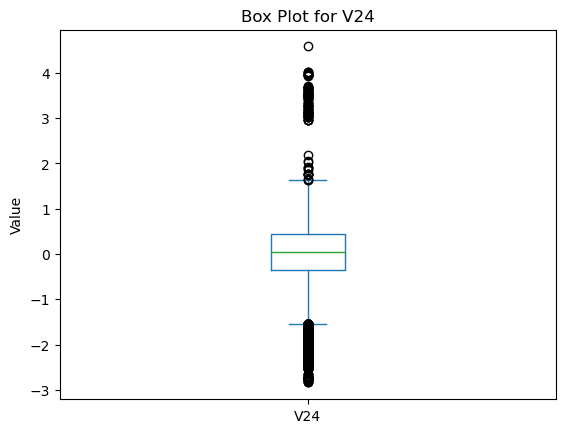

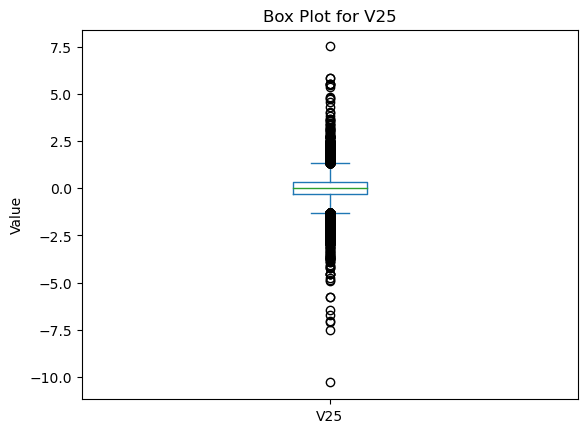

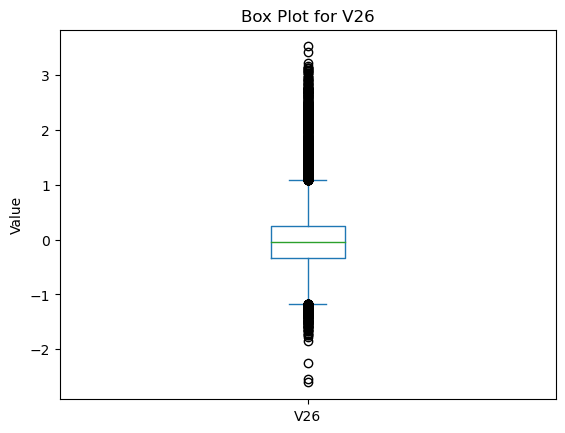

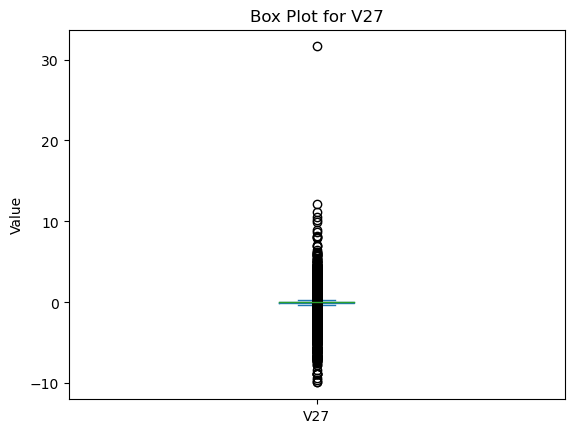

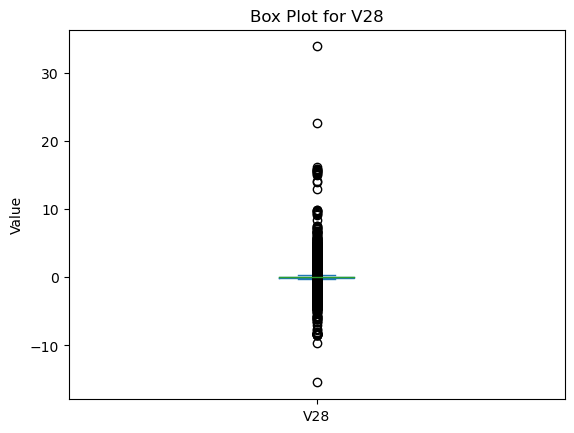

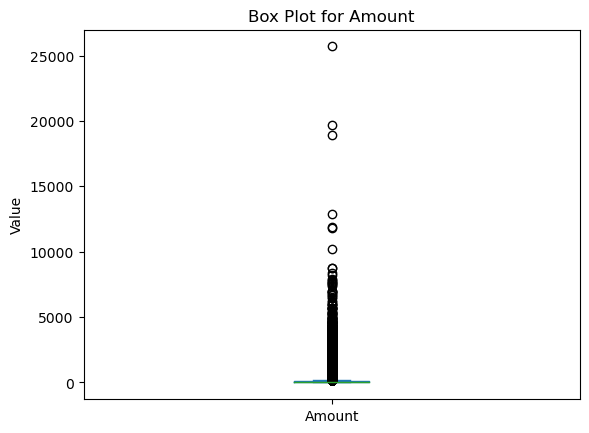

In [19]:
# Add the columns to a list
cols = X_train.columns

# Generate individual box plots for each feature
for col in cols:
    plt.figure()  # Create a new figure for each plot
    X_train[col].plot(kind='box')  # Generate the box plot
    plt.title(f'Box Plot for {col}')  # Add a title to the plot
    plt.ylabel('Value')  # Add a label to the y-axis
    plt.show()  # Show the plot

#### Based on all the charts above we can see that there are a lot of outliers on the PCA features. We must consider a model that is not sensitive to outliers.

#### Before modeling let's see the distribution of each feature and the correlation among them.

<AxesSubplot:title={'center':'Credit Card Transactions features correlation plot'}>

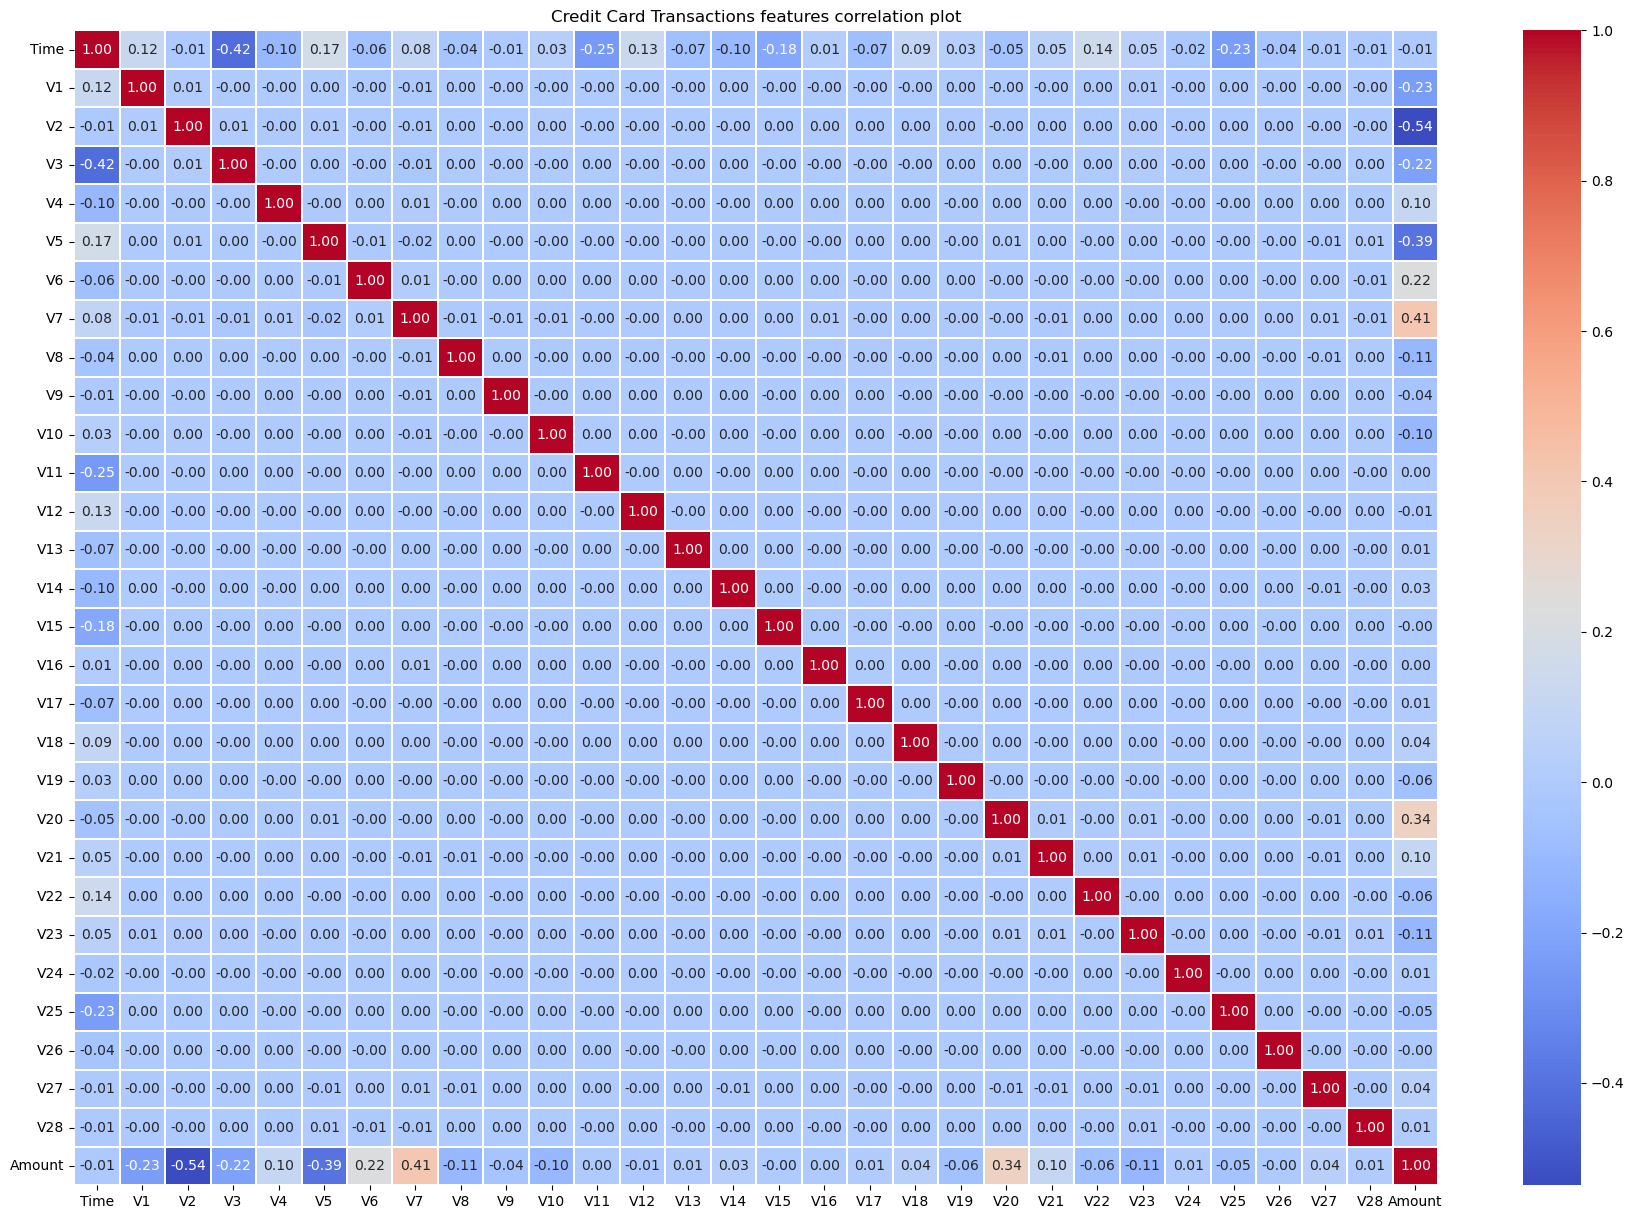

In [22]:
# Checking correlation using heatmap.
plt.figure(figsize = (22,15))
plt.title('Credit Card Transactions features correlation plot')
sns.heatmap(X_train.corr(),cmap='coolwarm',xticklabels=cols,yticklabels=cols,linewidths=.1,annot=True,fmt='.2f') 

#### Most of the features seem to be safe. That said we can see that V7 and V20 are on average more correlated to the amount of spending than other features. If we set 0.5 as a threshold, we shouldn't be that concerned. *Disclaimer this is a threshold set as an example and should not be a rule of thumb.


## Predictive Modelling using Decision Tree
#### Decision tree is a better model to consider because it is less sensitive to outliers and can be explainable. Advanced models can be considered to see improvement in results. 
#### But first, what should we use as performance metrics? What is an important factor for a credit card provider between making an error on prediction? if a customer makes a transaction and it gets flagged or predicted as a fraud the response will be to stop the transaction. Customers could get frustrated and cancel that card to move to another provider (opportunity cost of prediction wrong aka Type I error). If a customer doesn't make the transaction and our model fails to predict it as a fraud and the business loses that amount (Capital loss aka Type II error). 
#### To consider both errors we should use F1 score as a performance metric to evaluate our model.   
   

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
# Cross validation using F1_macro as measure of performance
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

pipe1 = Pipeline(steps=[
                        ("dt", dt)
                        ])


scores = cross_val_score(pipe1, X_train, y_train, cv=10, scoring="f1_macro")

with np.printoptions(formatter={'float': '{: 0.3f}'.format}): 
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores))) 

CV scores: [ 0.864  0.873  0.875  0.876  0.872  0.848  0.853  0.881  0.902  0.887]
Estimated F1 Score: 0.873 +/- 0.02


#### There is not much feature engineering that we can do and we will go to feature selection and Hyperparameter tunning to see if it improves the F1-score.

In [38]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
dt = DecisionTreeClassifier(splitter="best", class_weight=None, random_state=0)

# Create a recursive feature elimination object
rfe = RFE(estimator=dt, n_features_to_select=None)

# Set up the parameter grid for GridSearchCV
param_grid = {'estimator__criterion': ['gini', 'entropy'],
              'estimator__max_depth': [5, 7, 8, 12, 20],
              'estimator__max_leaf_nodes': [None, 5, 10, 20, 30, 40, 50, 100],
              'estimator__min_impurity_decrease': [0, 0.1, 0.2],
              'estimator__min_samples_split': [6, 8, 9, 10],
              'estimator__min_samples_leaf': [1, 4, 5, 7],
              'n_features_to_select': [5, 10, 15, 20, 25, 30]
              }

# Create the GridSearchCV object
clf_rs = GridSearchCV(estimator=rfe, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=2, return_train_score=True)

# Fit the GridSearchCV object to the data
clf_rs.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", clf_rs.best_params_)
print("Best score: ", clf_rs.best_score_)


Best parameters:  {'estimator__criterion': 'entropy', 'estimator__max_depth': 7, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0, 'estimator__min_samples_leaf': 7, 'estimator__min_samples_split': 6, 'n_features_to_select': 20}
Best score:  0.910516822596201


In [45]:
# Store the best parameters
best_params = clf_rs.best_params_
best_params

# Create a new instance of your estimator with the best hyperparameters
best_rs = DecisionTreeClassifier (criterion=best_params['estimator__criterion'],
                                         max_depth=best_params['estimator__max_depth'],
                                         max_leaf_nodes=best_params['estimator__max_leaf_nodes'],
                                         min_impurity_decrease=best_params['estimator__min_impurity_decrease'],
                                         min_samples_split=best_params['estimator__min_samples_split'],
                                         min_samples_leaf=best_params['estimator__min_samples_leaf'], random_state=0)
                                         
# Fit the new estimator on the training data                                       
best_rs = best_rs.fit(X_train, y_train)

In [46]:
# Cross-validation using the tuned model 
scores = cross_val_score(best_rs, X_train, y_train, cv=10, scoring="f1_macro") 


with np.printoptions(formatter={'float': '{: 0.3f}'.format}): 
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores))) 

CV scores: [ 0.940  0.908  0.908  0.900  0.895  0.906  0.930  0.908  0.930  0.917]
Estimated F1 Score: 0.914 +/- 0.01


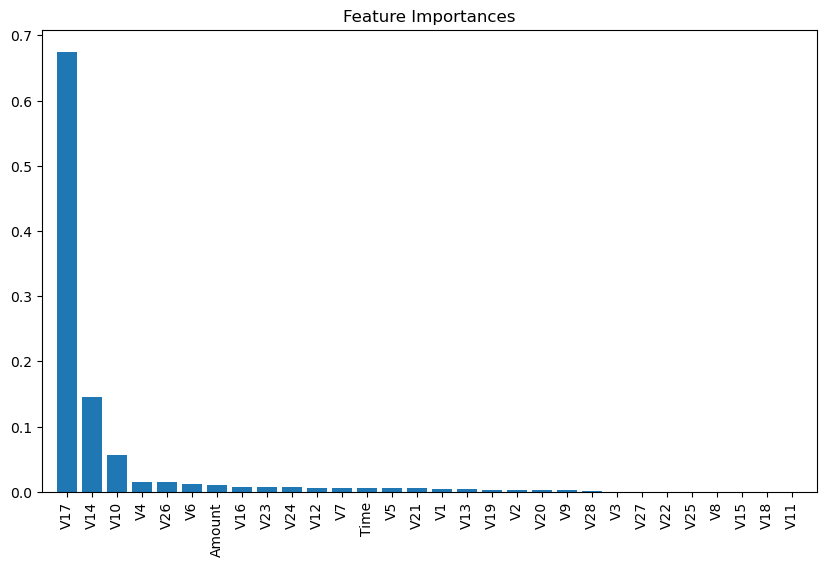

In [56]:
# Feature importance

# Get the feature importances and names from the trained model
importances = best_rs.feature_importances_
feature_names = X_train.columns.values

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [84]:
# Removing features that had low importance
X_train2 = X_train.drop(columns=['V11','V18','V15','V8','V25','V22','V27','V3'],axis=1)
X_train2

# Retraining the model with the same parameters 
best_rs2 = best_rs.fit(X_train2, y_train)

# Cross-validation using the tuned model 
scores = cross_val_score(best_rs2, X_train2, y_train, cv=10, scoring="f1_macro") 


with np.printoptions(formatter={'float': '{: 0.3f}'.format}): 
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores))) 

CV scores: [ 0.940  0.908  0.900  0.891  0.911  0.900  0.930  0.908  0.930  0.917]
Estimated F1 Score: 0.914 +/- 0.01


#### We have maintained the same F1 Score. So we can go ahead with dropping the features with the least importance.

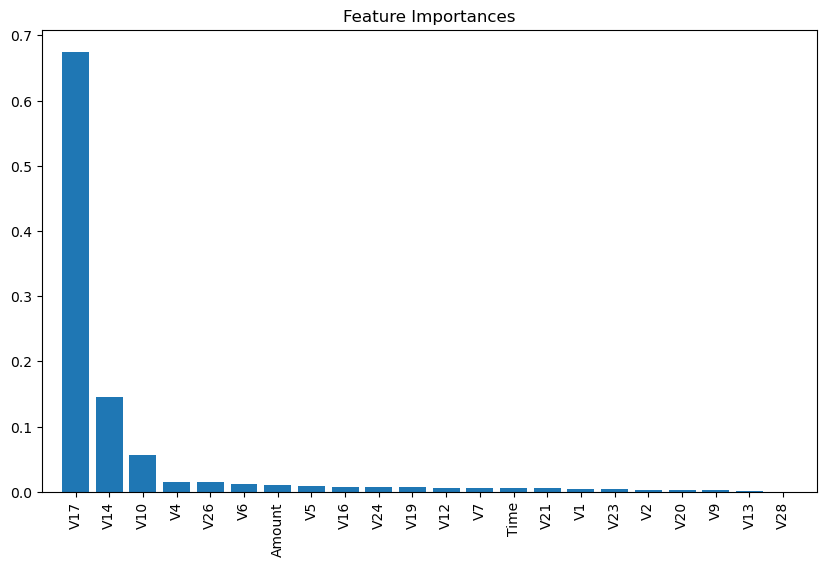

In [88]:
# Get the feature importances and names from the trained model
importances2 = best_rs2.feature_importances_
feature_names2 = X_train2.columns.values

# Sort the feature importances in descending order
indices2 = np.argsort(importances2)[::-1]

# Plot the feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train2.shape[1]), importances2[indices2])
plt.xticks(range(X_train2.shape[1]), feature_names2[indices2], rotation=90)
plt.xlim([-1, X_train2.shape[1]])
plt.show()

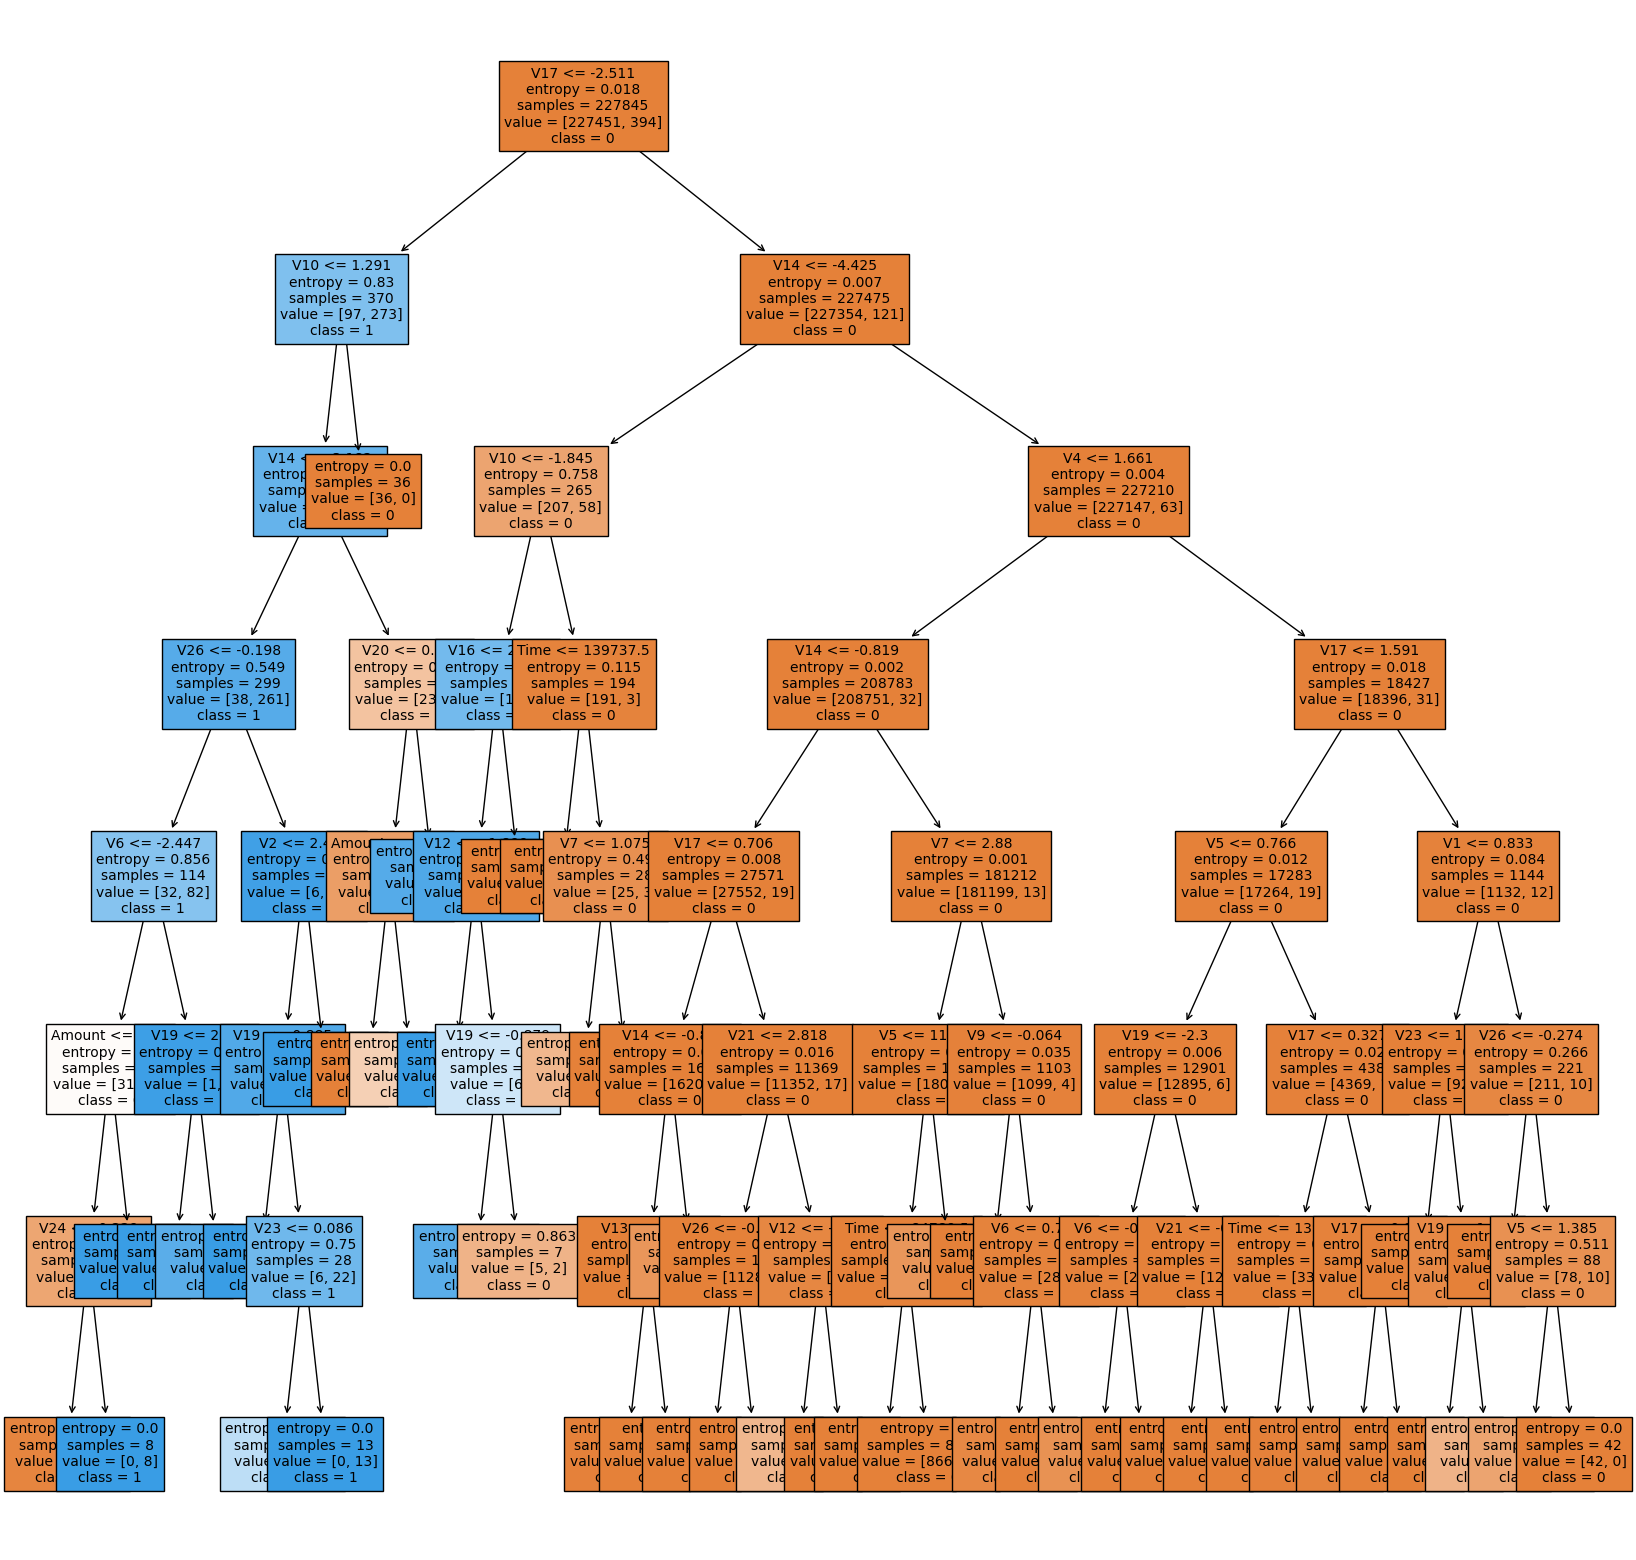

In [90]:
# Model Visualization
from sklearn import tree

# Store the class options for the visualization of the model
class_names2 = [str(x) for x in best_rs2.classes_]
feature_names2 = X_train2.columns.values

# Plot the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(best_rs2, filled=True, feature_names=feature_names2, 
               class_names=class_names2, proportion=False, fontsize=10, ax=axes)

plt.show()

### Test data prediction

In [91]:
from sklearn.metrics import classification_report

# Removing features that had low importance
X_test2 = X_test.drop(columns=['V11','V18','V15','V8','V25','V22','V27','V3'],axis=1)
X_test2

y_pred_rs =best_rs2.predict(X_test2)
print(classification_report(y_test, y_pred_rs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [95]:
from sklearn.metrics import f1_score
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_rs)))


F1 Score = 0.86


In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rs)

array([[56860,     4],
       [   21,    77]], dtype=int64)

### Conclusion
#### We have gone through all the possible ways of EDA to know our data better but with the data dominated by V features that are results of PCA. We were not able to engineer more features to extract the most out of the data. That said the initial training F1 Score of 87% was a great start. After tuning the model and removing features that contributed the least to the trained model, we had an increased F1 Score of 91.4% for training. Finally, we ended with an F1 score of 86% which is a great performance for a model that is imbalanced. If we assume the loss of misclassification a fraud (Type II Error) 2,000 per customer it will amount to 8,000. If we assume we have an opportunity cost of 1,000 for each false positive - Customer made the transaction but we flagged it as Fraud (Type I Error), we will lose out on a profit of 77,000 we could have had because our the error made by our ML model. Given these insights the team should discuss the dollar value it will cost to further train this model with more data to improve performance or if the model is fine as is before deploying the ML model into production.  